In [1]:
# Importamos las librerías necesarias
import pandas as pd  # Para manipulación de datos y carga de CSV
import matplotlib.pyplot as plt  # Para gráficos básicos
import seaborn as sns  # Para visualizaciones estadísticas
import numpy as np  # Para operaciones numéricas
from pathlib import Path  # Para manejo de rutas de archivos

In [2]:
# Ruta proporcionada (parece apuntar a un .ipynb; si el CSV está en la misma carpeta, se buscará allí)
p = Path(r"C:\Users\braya\OneDrive - Universidad Nacional Abierta y a Distancia\Desktop\UNAD\SEMESTRE 8\PROYECTO DE GRADO\FASE 4\Analisis GEI.ipynb")

# Determinar qué archivo CSV cargar
if p.exists() and p.suffix.lower() == ".csv":
    csv_path = p
else:
    dir_path = p if p.is_dir() else p.parent
    csv_files = sorted(dir_path.glob("*.csv"))
    if not csv_files:
        raise FileNotFoundError(f"No se encontró ningún archivo .csv en {dir_path}")
    csv_path = csv_files[0]
    if len(csv_files) > 1:
        print("Se encontraron varios archivos CSV. Se cargará el primero:", csv_path)
    else:
        print("CSV encontrado:", csv_path)

# Cargar el CSV en el dataframe `df` (usa pandas importado en la celda anterior)
df = pd.read_csv(csv_path, encoding="utf-8", on_bad_lines="skip")
print(f"Cargado: {csv_path} — filas: {len(df)}, columnas: {len(df.columns)}")
df.head()

CSV encontrado: C:\Users\braya\OneDrive - Universidad Nacional Abierta y a Distancia\Desktop\UNAD\SEMESTRE 8\PROYECTO DE GRADO\FASE 4\Inventario_Nacional_Gases_Efecto_Invernadero_20251118.csv
Cargado: C:\Users\braya\OneDrive - Universidad Nacional Abierta y a Distancia\Desktop\UNAD\SEMESTRE 8\PROYECTO DE GRADO\FASE 4\Inventario_Nacional_Gases_Efecto_Invernadero_20251118.csv — filas: 12433, columnas: 41


,AÑO,CLASIFICACION,CH4,CO2,CO2_ABS,HFC-125,HFC-134a,HFC-143a,HFC-152a,HFC-227ea,...,HFC-32_eq,HFC-365mfc_eq,HFC-43-10mee_eq,N2O_eq,PFC-116_eq,PFC-14_eq,SF6_eq,Total_Emisiones,Absorciones,Emisiones_netas
0,"1,990",1 Energía,187.89066785194,"44,309.89616516627",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,666.17062077316,NaN,NaN,NaN,"50,237.00548579387",0,"50,237.00548579387"
1,"1,990",1.A. Actividades de quema de combustibles (enf...,99.56838734724,"42,880.19692609224",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,660.96088655215,NaN,NaN,NaN,"46,329.07265836706",0,"46,329.07265836706"
2,"1,990",1.A.1. Industrias de la energía,0.19343458206,"11,246.13750577631",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.75279601198,NaN,NaN,NaN,"11,267.30647008597",0,"11,267.30647008597"
3,"1,990",1.A.1.a. Producción de electricidad pública y ...,0.10012587669,"6,050.47958679878",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.93488043473,NaN,NaN,NaN,"6,066.21799178076",0,"6,066.21799178076"
4,"1,990",1.A.1.ai. Generación de electricidad,0.10012587669,"6,050.47958679878",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.93488043473,NaN,NaN,NaN,"6,066.21799178076",0,"6,066.21799178076"


In [3]:
#Mostrar info del dataframe original
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AÑO              12433 non-null  object 
 1   CLASIFICACION    12433 non-null  object 
 2   CH4              11552 non-null  object 
 3   CO2              11744 non-null  object 
 4   CO2_ABS          8640 non-null   object 
 5   HFC-125          315 non-null    float64
 6   HFC-134a         315 non-null    float64
 7   HFC-143a         315 non-null    float64
 8   HFC-152a         315 non-null    float64
 9   HFC-227ea        315 non-null    float64
 10  HFC-23           315 non-null    float64
 11  HFC-236fa        315 non-null    float64
 12  HFC-245fa        315 non-null    float64
 13  HFC-32           315 non-null    float64
 14  HFC-365mfc       315 non-null    float64
 15  HFC-43-10mee     315 non-null    float64
 16  N2O              11008 non-null  float64
 17  PFC-116     

In [4]:
# Mostrar estadisticas descriptivas
df.describe()

,HFC-125,HFC-134a,HFC-143a,HFC-152a,HFC-227ea,HFC-23,HFC-236fa,HFC-245fa,HFC-32,HFC-365mfc,...,HFC-227ea_eq,HFC-23_eq,HFC-236fa_eq,HFC-245fa_eq,HFC-32_eq,HFC-365mfc_eq,HFC-43-10mee_eq,PFC-116_eq,PFC-14_eq,SF6_eq
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,...,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,128.000000
mean,0.035079,0.204161,0.019586,0.002363,0.000337,0.000003,0.000001,0.000026,0.012197,0.003058,...,1.130253,0.031997,0.009016,0.022194,8.257308,2.458860,0.035957,0.022704,0.005007,93.482167
std,0.078095,0.344116,0.043333,0.005102,0.001527,0.000005,0.000005,0.000081,0.032628,0.018564,...,5.114792,0.067838,0.041303,0.069789,22.088853,14.925792,0.182631,0.046415,0.020688,57.016586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.200000
25%,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.041080
50%,0.000105,0.029777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.319477
75%,0.023123,0.238149,0.008929,0.000000,0.000000,0.000000,0.000000,0.000000,0.001257,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.850755,0.000000,0.000000,0.000000,0.000000,150.144475
max,0.356570,1.509024,0.185047,0.020677,0.013211,0.000023,0.000038,0.000465,0.151238,0.161669,...,44.257763,0.288676,0.302850,0.398787,102.388037,129.981657,1.303434,0.137282,0.139251,199.633576


Vamos a seleccionar solo las columnas mas relevantes para nuestro analisis de emisiones y gases efecto invernadero

In [5]:
# Selección de columnas relevantes para análisis de GEI

# Columnas que son relevantes: año, clasificación, gases principales y columnas en eq + totales/absorciones
cols_keep = [
    "AÑO", "CLASIFICACION",
    "CH4", "CO2", "CO2_ABS", "N2O", "SF6",
    "CH4_eq", "CO2_eq", "CO2_ABS_eq", "N2O_eq",
    "Total_Emisiones", "Absorciones", "Emisiones_netas"
]

# Seleccionar solo las que existen en el df original 
cols_keep = [c for c in cols_keep if c in df.columns]
df_clean = df[cols_keep].copy()

df_clean.head()

,AÑO,CLASIFICACION,CH4,CO2,CO2_ABS,N2O,SF6,CH4_eq,CO2_eq,CO2_ABS_eq,N2O_eq,Total_Emisiones,Absorciones,Emisiones_netas
0,"1,990",1 Energía,187.89066785194,"44,309.89616516627",NaN,2.513851,NaN,"5,260.93869985444","44,309.89616516627",NaN,666.17062077316,"50,237.00548579387",0,"50,237.00548579387"
1,"1,990",1.A. Actividades de quema de combustibles (enf...,99.56838734724,"42,880.19692609224",NaN,2.494192,NaN,"2,787.91484572267","42,880.19692609224",NaN,660.96088655215,"46,329.07265836706",0,"46,329.07265836706"
2,"1,990",1.A.1. Industrias de la energía,0.19343458206,"11,246.13750577631",NaN,0.059445,NaN,5.41616829768,"11,246.13750577631",NaN,15.75279601198,"11,267.30647008597",0,"11,267.30647008597"
3,"1,990",1.A.1.a. Producción de electricidad pública y ...,0.10012587669,"6,050.47958679878",NaN,0.048811,NaN,2.80352454726,"6,050.47958679878",NaN,12.93488043473,"6,066.21799178076",0,"6,066.21799178076"
4,"1,990",1.A.1.ai. Generación de electricidad,0.10012587669,"6,050.47958679878",NaN,0.048811,NaN,2.80352454726,"6,050.47958679878",NaN,12.93488043473,"6,066.21799178076",0,"6,066.21799178076"


In [6]:
# Mostrar estadisticas descriptivas
df_clean.describe()

,N2O,SF6
count,11008.000000,128.000000
mean,0.626842,0.003978
std,3.523297,0.002426
min,0.000000,0.001200
25%,0.000000,0.001661
50%,0.000000,0.003673
75%,0.052831,0.006389
max,50.850699,0.008495


Indentificamos el tipo de dato con los que estamos trabajando

In [7]:
df_clean.dtypes

AÑO                 object
CLASIFICACION       object
CH4                 object
CO2                 object
CO2_ABS             object
N2O                float64
SF6                float64
CH4_eq              object
CO2_eq              object
CO2_ABS_eq          object
N2O_eq              object
Total_Emisiones     object
Absorciones         object
Emisiones_netas     object
dtype: object

In [8]:
# Convertir columnas object que deberían ser numéricas en df_clean

# columnas object (texto) presentes en df_clean
obj_cols = df_clean.select_dtypes(include="object").columns.tolist()

# excluir la columna categórica
exclude = ["CLASIFICACION"]
for col in obj_cols:
    if col in exclude:
        continue
    # normalizar texto: quitar espacios, separador de miles (',') y cualquier caracter no numérico
    s = df_clean[col].astype(str).str.strip()
    s = s.replace("", pd.NA)  # convertir cadenas vacías a NA
    s = s.str.replace(",", "", regex=False)  # quitar separador de miles
    s = s.str.replace(r"[^\d\.\-eE]", "", regex=True)  # dejar sólo dígitos, punto, signo - y notación científica
    # convertir a numérico (float), valores no convertibles pasan a NaN
    df_clean[col] = pd.to_numeric(s, errors="coerce")

# Convertir AÑO a entero nullable si la conversión fue exitosa
if "AÑO" in df_clean.columns:
    df_clean["AÑO"] = pd.to_numeric(df_clean["AÑO"], errors="coerce").astype("Int64")

# Mostrar resumen de tipos y número de valores no nulos por columna
print(df_clean.dtypes)
print("\nConteo de no nulos después de la conversión:")
print(df_clean.notna().sum())

# vista rápida para verificar
df_clean.head()

AÑO                  Int64
CLASIFICACION       object
CH4                float64
CO2                float64
CO2_ABS            float64
N2O                float64
SF6                float64
CH4_eq             float64
CO2_eq             float64
CO2_ABS_eq         float64
N2O_eq             float64
Total_Emisiones    float64
Absorciones        float64
Emisiones_netas    float64
dtype: object

Conteo de no nulos después de la conversión:
AÑO                12433
CLASIFICACION      12433
CH4                11552
CO2                11744
CO2_ABS             8640
N2O                11008
SF6                  128
CH4_eq             11552
CO2_eq             11744
CO2_ABS_eq          8640
N2O_eq             11008
Total_Emisiones    12433
Absorciones        12433
Emisiones_netas    12433
dtype: int64


,AÑO,CLASIFICACION,CH4,CO2,CO2_ABS,N2O,SF6,CH4_eq,CO2_eq,CO2_ABS_eq,N2O_eq,Total_Emisiones,Absorciones,Emisiones_netas
0,1990,1 Energía,187.890668,44309.896165,NaN,2.513851,NaN,5260.938700,44309.896165,NaN,666.170621,50237.005486,0.0,50237.005486
1,1990,1.A. Actividades de quema de combustibles (enf...,99.568387,42880.196926,NaN,2.494192,NaN,2787.914846,42880.196926,NaN,660.960887,46329.072658,0.0,46329.072658
2,1990,1.A.1. Industrias de la energía,0.193435,11246.137506,NaN,0.059445,NaN,5.416168,11246.137506,NaN,15.752796,11267.306470,0.0,11267.306470
3,1990,1.A.1.a. Producción de electricidad pública y ...,0.100126,6050.479587,NaN,0.048811,NaN,2.803525,6050.479587,NaN,12.934880,6066.217992,0.0,6066.217992
4,1990,1.A.1.ai. Generación de electricidad,0.100126,6050.479587,NaN,0.048811,NaN,2.803525,6050.479587,NaN,12.934880,6066.217992,0.0,6066.217992


In [9]:
#Mostrar info del dataframe limpio
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12433 entries, 0 to 12432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AÑO              12433 non-null  Int64  
 1   CLASIFICACION    12433 non-null  object 
 2   CH4              11552 non-null  float64
 3   CO2              11744 non-null  float64
 4   CO2_ABS          8640 non-null   float64
 5   N2O              11008 non-null  float64
 6   SF6              128 non-null    float64
 7   CH4_eq           11552 non-null  float64
 8   CO2_eq           11744 non-null  float64
 9   CO2_ABS_eq       8640 non-null   float64
 10  N2O_eq           11008 non-null  float64
 11  Total_Emisiones  12433 non-null  float64
 12  Absorciones      12433 non-null  float64
 13  Emisiones_netas  12433 non-null  float64
dtypes: Int64(1), float64(12), object(1)
memory usage: 1.3+ MB


Al haber tantas clasificaciones la informacion no es facil de manejar por lo que se debe normalizar esta columna para trabajar con una menor cantidad de variables

In [10]:
# Contar clasificaciones únicas en df_clean
n_unique = df_clean["CLASIFICACION"].nunique(dropna=True)
print("Número de clasificaciones únicas:", n_unique)

# Ver el conteo por clasificación 
vc = df_clean["CLASIFICACION"].value_counts()


# Lista completa de clasificaciones únicas
unique_clasificaciones = vc.index.tolist()
print(unique_clasificaciones)  

Número de clasificaciones únicas: 393
['1 Energía', '1.A. Actividades de quema de combustibles (enfoque sectorial)', '1.A.1. Industrias de la energía', '1.A.1.a. Producción de electricidad pública y calor como actividad principal', '1.A.1.ai. Generación de electricidad', '1.A.1.b. Refinación del petróleo', '1.A.1.c. Fabricación de combustibles sólidos y otras energías.', '1.A.1.c.i. Manufactura de Combustibles sólidos', '1.A.1.c.ii. Extracción de petróleo y gas', '1.A.1.c.iii. Otras industrias de la energía', '1.A.2. Industrias manufactureras y construcción.', '1.A.2.a. Hierro y acero', '1.A.2.b. Metales no ferrosos', '1.A.2.c. Productos químicos', '1.A.2.d. Pulpa, papel e imprenta', '1.A.2.e. Procesamiento de alimentos, bebidas y tabaco', '1.A.2.f. Minerales no metálicos', '1.A.2.g. Otros', '1.A.2.g.i. Manufactura de maquinaria', '1.A.2.g.ii. Manufactura de equipos de transporte', '1.A.2.g.iii. Minería (con excepción de combustibles) y cantería', '1.A.2.g.iv. Madera y productos de la 

In [11]:
#Reclasificación jerárquica: niveles 1 y 2 de la columna CLASIFICACION con el fin de agrupar mejor los datos

import re

# Funciones auxiliares
def clean_label(s):
    if pd.isna(s):
        return s
    return re.sub(r"\s*\(.*?\)", "", str(s)).strip()

def find_label_from_map_or_df(code, code_map, df):
    # buscar en code_map
    if code in code_map:
        return code_map[code]
    # buscar en df_clean por filas que comiencen con el código + espacio o con código + '.'
    starts_space = df["CLASIFICACION"].str.startswith(f"{code} ")
    starts_dot = df["CLASIFICACION"].str.startswith(f"{code}.")
    if starts_space.any():
        return df.loc[starts_space, "CLASIFICACION"].iloc[0]
    if starts_dot.any():
        return df.loc[starts_dot, "CLASIFICACION"].iloc[0]
    
    return code

# Generar columnas CLAS_N1 (nivel 1) y CLAS_N2 (nivel 2)
n1_labels = []
n2_labels = []

code_map = {}

for clas in df_clean["CLASIFICACION"].astype(str):
    # extraer la secuencia de código inicial (ej: "1", "1.A", "1.A.1", "2.F.6", ...)
    m = re.match(r"^([A-Za-z0-9]+(?:\.[A-Za-z0-9]+)*)", clas)
    code = m.group(1) if m else ""
    parts = code.split(".") if code else []
    # nivel 1: primer componente (ej "1")
    level1_code = parts[0] if parts else ""
    # nivel 2: si existe al menos 2 componentes, unir las dos primeras; si no, usar la primera
    level2_code = level1_code if len(parts) < 2 else ".".join(parts[:2])
    if m:
        code = m.group(1)
        code_map[code] = clas


    # obtener etiqueta desde code_map o desde filas existentes
    lab1 = find_label_from_map_or_df(level1_code, code_map, df_clean)
    lab2 = find_label_from_map_or_df(level2_code, code_map, df_clean)

    # limpiar (quitar paréntesis, etc.)
    n1_labels.append(clean_label(lab1))
    n2_labels.append(clean_label(lab2))

# Asignar (sobrescribe si ya existían)
df_clean["CLAS_N1"] = n1_labels
df_clean["CLAS_N2"] = n2_labels

# Comprobación rápida: mismo número de filas
assert len(df_clean) == 12433, f"Se esperaban 12433 filas pero hay {len(df_clean)}"

# Mostrar resultado resumen
df_clean[["CLASIFICACION", "CLAS_N1", "CLAS_N2"]].head(50)

,CLASIFICACION,CLAS_N1,CLAS_N2
0,1 Energía,1 Energía,1 Energía
1,1.A. Actividades de quema de combustibles (enf...,1 Energía,1.A. Actividades de quema de combustibles
2,1.A.1. Industrias de la energía,1 Energía,1.A. Actividades de quema de combustibles
3,1.A.1.a. Producción de electricidad pública y ...,1 Energía,1.A. Actividades de quema de combustibles
4,1.A.1.ai. Generación de electricidad,1 Energía,1.A. Actividades de quema de combustibles
5,1.A.1.b. Refinación del petróleo,1 Energía,1.A. Actividades de quema de combustibles
6,1.A.1.c. Fabricación de combustibles sólidos y...,1 Energía,1.A. Actividades de quema de combustibles
7,1.A.1.c.i. Manufactura de Combustibles sólidos,1 Energía,1.A. Actividades de quema de combustibles
8,1.A.1.c.ii. Extracción de petróleo y gas,1 Energía,1.A. Actividades de quema de combustibles
9,1.A.1.c.iii. Otras industrias de la energía,1 Energía,1.A. Actividades de quema de combustibles


Reemplazamos la clasificacion antigua por la nueva clasificacion

In [12]:
# Eliminar la columna CLASIFICACION y conservar CLAS_N1 y CLAS_N2
if "CLASIFICACION" in df_clean.columns:
    df_clean.drop(columns="CLASIFICACION", inplace=True)

# Si existen otros dataframes derivados, también eliminar allí
for name in ("grouped", "grouped_2"):
    if name in globals():
        df_tmp = globals()[name]
        if isinstance(df_tmp, pd.DataFrame) and "CLASIFICACION" in df_tmp.columns:
            df_tmp.drop(columns="CLASIFICACION", inplace=True)

# Verificación rápida
print("Columnas en df_clean:", df_clean.columns.tolist())
df_clean.head()

Columnas en df_clean: ['AÑO', 'CH4', 'CO2', 'CO2_ABS', 'N2O', 'SF6', 'CH4_eq', 'CO2_eq', 'CO2_ABS_eq', 'N2O_eq', 'Total_Emisiones', 'Absorciones', 'Emisiones_netas', 'CLAS_N1', 'CLAS_N2']


,AÑO,CH4,CO2,CO2_ABS,N2O,SF6,CH4_eq,CO2_eq,CO2_ABS_eq,N2O_eq,Total_Emisiones,Absorciones,Emisiones_netas,CLAS_N1,CLAS_N2
0,1990,187.890668,44309.896165,NaN,2.513851,NaN,5260.938700,44309.896165,NaN,666.170621,50237.005486,0.0,50237.005486,1 Energía,1 Energía
1,1990,99.568387,42880.196926,NaN,2.494192,NaN,2787.914846,42880.196926,NaN,660.960887,46329.072658,0.0,46329.072658,1 Energía,1.A. Actividades de quema de combustibles
2,1990,0.193435,11246.137506,NaN,0.059445,NaN,5.416168,11246.137506,NaN,15.752796,11267.306470,0.0,11267.306470,1 Energía,1.A. Actividades de quema de combustibles
3,1990,0.100126,6050.479587,NaN,0.048811,NaN,2.803525,6050.479587,NaN,12.934880,6066.217992,0.0,6066.217992,1 Energía,1.A. Actividades de quema de combustibles
4,1990,0.100126,6050.479587,NaN,0.048811,NaN,2.803525,6050.479587,NaN,12.934880,6066.217992,0.0,6066.217992,1 Energía,1.A. Actividades de quema de combustibles


In [13]:
# detectar columnas numéricas que tienen valores faltantes
missing_cols = [c for c in df_clean.select_dtypes(include=[np.number]).columns if df_clean[c].isna().any()]
print("Columnas con datos faltantes detectadas:", missing_cols)

# agrupar por año y CLAS_N2 y calcular la media (NaN se ignora por defecto)
grouped_means = df_clean.groupby(["AÑO", "CLAS_N2"])[missing_cols].mean().reset_index()

# mostrar resultado
grouped_means

Columnas con datos faltantes detectadas: ['CH4', 'CO2', 'CO2_ABS', 'N2O', 'SF6', 'CH4_eq', 'CO2_eq', 'CO2_ABS_eq', 'N2O_eq']


,AÑO,CLAS_N2,CH4,CO2,CO2_ABS,N2O,SF6,CH4_eq,CO2_eq,CO2_ABS_eq,N2O_eq
0,1990,1 Energía,187.890668,44309.896165,NaN,2.513851,NaN,5260.938700,44309.896165,NaN,666.170621
1,1990,1.A. Actividades de quema de combustibles,9.004078,3584.588577,NaN,0.223085,NaN,252.114190,3584.588577,NaN,59.117606
2,1990,1.B. Emisiones fugitivas de combustibles,16.496110,283.717666,NaN,0.005461,NaN,461.891074,283.717666,NaN,1.447119
3,1990,2 Procesos industriales,0.012969,3818.349624,NaN,0.995377,0.001774,0.363135,3818.349624,NaN,263.774894
4,1990,2.A. industria de los minerales,NaN,1138.678365,NaN,NaN,NaN,NaN,1138.678365,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2832,2021,5 Residuos,752.849567,377.368125,NaN,2.837325,NaN,21079.787875,377.368125,NaN,751.891132
2833,2021,5.A. Eliminación de residuos sólidos,310.159017,NaN,NaN,NaN,NaN,8684.452479,NaN,NaN,NaN
2834,2021,5.C. Incineración e incineración abierta de de...,6.535412,226.420875,NaN,0.086592,NaN,182.991530,226.420875,NaN,22.946797
2835,2021,5.D. Tratamiento y descarga de aguas residuales.,219.386948,NaN,NaN,1.833822,NaN,6142.834545,NaN,NaN,485.962890


Ahora reemplazamos los valores faltantes con la media segun el año y clasificacion. Para aquellos valores que no se encuentra el promedio se reemplaza con 0

In [14]:
# columnas numéricas de grouped_means a usar (excluir AÑO y CLAS_N2)
mean_cols = [c for c in grouped_means.columns if c not in ("AÑO", "CLAS_N2")]

# limitar a las columnas que realmente existen en df_clean (evita crear columnas irrelevantes)
mean_cols = [c for c in mean_cols if c in df_clean.columns]

# renombrar las columnas de grouped_means para evitar colisiones al hacer merge
gm = grouped_means[["AÑO", "CLAS_N2"] + mean_cols].copy()
gm = gm.rename(columns={c: f"{c}_mean" for c in mean_cols})

# merge left para añadir las medias como columnas auxiliares
df_tmp = df_clean.merge(gm, on=["AÑO", "CLAS_N2"], how="left")

# para cada columna, rellenar NaN con la media correspondiente, y si la media también es NaN poner 0
for c in mean_cols:
    mean_col = f"{c}_mean"
    if mean_col in df_tmp.columns:
        df_tmp[c] = df_tmp[c].fillna(df_tmp[mean_col])   # usar la media por (AÑO, CLAS_N2)
        df_tmp[c] = df_tmp[c].fillna(0)                 # si no hay media disponible, poner 0

# eliminar columnas auxiliares de medias
drop_cols = [f"{c}_mean" for c in mean_cols if f"{c}_mean" in df_tmp.columns]
df_tmp.drop(columns=drop_cols, inplace=True)

# reasignar al dataframe original (opcional)
df_clean = df_tmp

# verificación rápida
df_clean[mean_cols].isna().sum()

CH4           0
CO2           0
CO2_ABS       0
N2O           0
SF6           0
CH4_eq        0
CO2_eq        0
CO2_ABS_eq    0
N2O_eq        0
dtype: int64

In [15]:
# Mostrar estadisticas descriptivas despues de llenar los datos faltantes
df_clean.describe()

,AÑO,CH4,CO2,CO2_ABS,N2O,SF6,CH4_eq,CO2_eq,CO2_ABS_eq,N2O_eq,Total_Emisiones,Absorciones,Emisiones_netas
count,12433.0,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000
mean,2005.620767,30.239455,2437.301877,-173.231901,0.568407,0.000041,846.704727,2437.301877,-173.231901,150.627804,3440.983996,-173.231901,3267.752095
std,9.210846,171.514750,13145.011181,1299.421715,3.320794,0.000471,4802.412992,13145.011181,1299.421715,880.010523,16343.719212,1299.421715,15489.620153
min,1990.0,0.000000,0.000000,-22832.043394,0.000000,0.000000,0.000000,0.000000,-22832.043394,0.000000,0.000000,-22832.043394,-5996.968702
25%,1998.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.894899,0.000000,55.991430
75%,2014.0,1.248052,107.984739,0.000000,0.043405,0.000000,34.945442,107.984739,0.000000,11.502242,813.745655,0.000000,762.423564
max,2021.0,2718.062574,216410.726946,67.764878,50.850699,0.008495,76105.752069,216410.726946,67.764878,13475.435190,306222.311725,67.764878,284504.087892


Graficamos los niveles de emisiones netas por año 

<Figure size 1200x600 with 0 Axes>

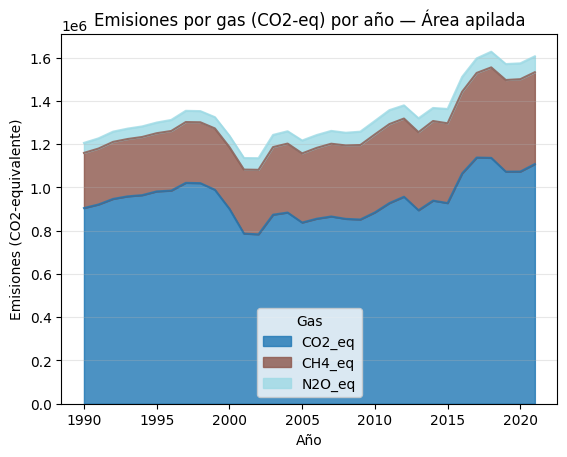

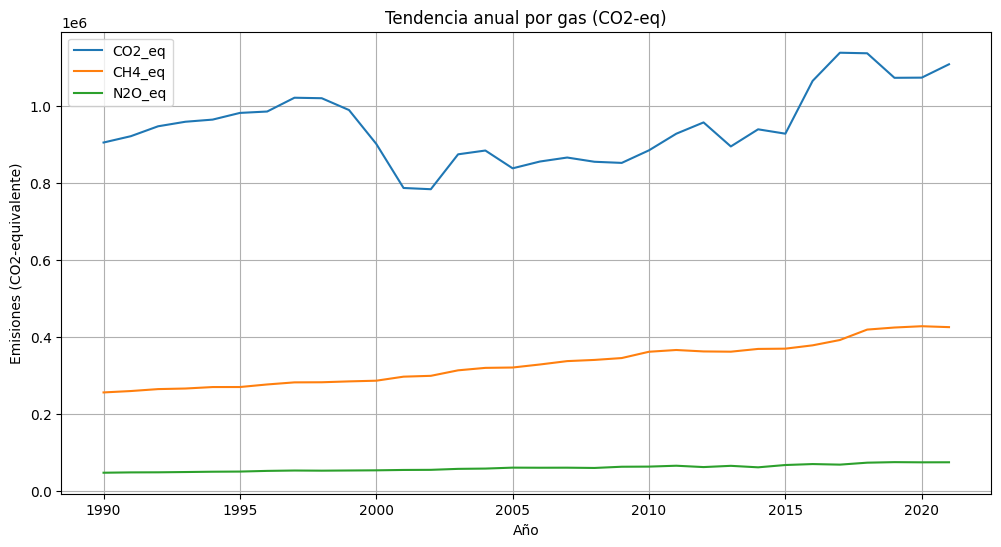

In [16]:
# columnas en CO2-eq a graficar (solo las que existan en df_clean)
cols = [c for c in ["CO2_eq", "CH4_eq", "N2O_eq"] if c in df_clean.columns]

# agregar por año
df_year = df_clean.groupby("AÑO")[cols].sum().sort_index()

# Área apilada
plt.figure(figsize=(12,6))
df_year.plot(kind="area", stacked=True, cmap="tab20", alpha=0.8)
plt.xlabel("Año")
plt.ylabel("Emisiones (CO2-equivalente)")
plt.title("Emisiones por gas (CO2-eq) por año — Área apilada")
plt.legend(title="Gas")
plt.grid(axis="y", alpha=0.3)
plt.show()

# Gráfico de líneas (tendencias por gas)
plt.figure(figsize=(12,6))
for col in cols:
    sns.lineplot(x=df_year.index, y=df_year[col], label=col)
plt.xlabel("Año")
plt.ylabel("Emisiones (CO2-equivalente)")
plt.title("Tendencia anual por gas (CO2-eq)")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Eliminar filas donde CLAS_N1 y CLAS_N2 sean "Nacional" 
before = len(df_clean)
mask_nacional = (
    df_clean["CLAS_N1"].fillna("").astype(str).str.strip().str.lower().eq("nacional")
) | (
    df_clean["CLAS_N2"].fillna("").astype(str).str.strip().str.lower().eq("nacional")
)

# Reasignar df_clean sin esas filas
df_clean = df_clean.loc[~mask_nacional].copy()
print(f"Filas eliminadas: {mask_nacional.sum()} — filas restantes: {len(df_clean)}")


Filas eliminadas: 32 — filas restantes: 12401


     Año                                     Sector      Emisiones
0   1990                    4.A. Tierras forestales  234695.251428
1   1991                    4.A. Tierras forestales  234803.529147
2   1992                    4.A. Tierras forestales  234875.970034
3   1993                    4.A. Tierras forestales  233915.821790
4   1994                    4.A. Tierras forestales  233902.070457
5   1995                    4.A. Tierras forestales  234058.918655
6   1996                    4.A. Tierras forestales  234025.451780
7   1997                    4.A. Tierras forestales  233975.827480
8   1998                    4.A. Tierras forestales  232769.903796
9   1999                    4.A. Tierras forestales  231484.108290
10  2000  1.A. Actividades de quema de combustibles  208041.180829
11  2001  1.A. Actividades de quema de combustibles  199976.786200
12  2002  1.A. Actividades de quema de combustibles  196698.206540
13  2003  1.A. Actividades de quema de combustibles  202460.43

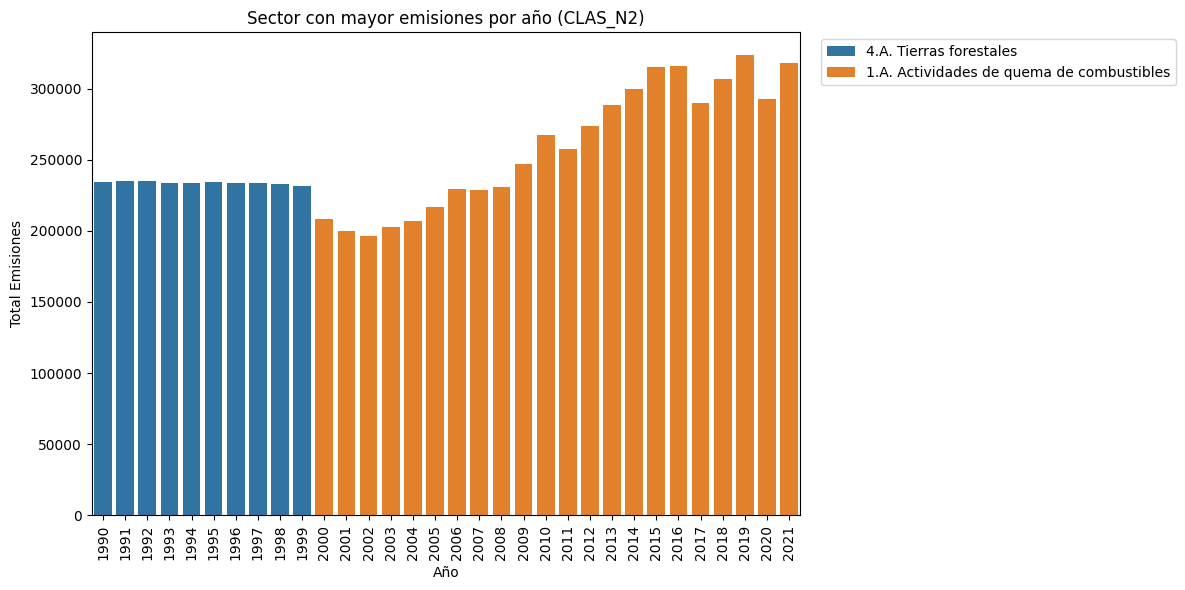

In [18]:
# Agrupar por año y CLAS_N2 sumando las emisiones
year_sector = df_clean.groupby(["AÑO", "CLAS_N2"], as_index=False)["Total_Emisiones"].sum()

# Para cada año, obtener la fila con el máximo de Total_Emisiones
idx_max = year_sector.groupby("AÑO")["Total_Emisiones"].idxmax()
top_sectors = year_sector.loc[idx_max].sort_values("AÑO").reset_index(drop=True)

# Renombrar columnas para presentación
top_sectors = top_sectors.rename(columns={"AÑO": "Año", "CLAS_N2": "Sector", "Total_Emisiones": "Emisiones"})

# Mostrar resultado
print(top_sectors)

# Gráfico opcional: barra por año con el sector más contaminante (cada barra coloreada por sector)
plt.figure(figsize=(12,6))
sns.barplot(data=top_sectors, x="Año", y="Emisiones", hue="Sector", dodge=False)
plt.xticks(rotation=90)
plt.ylabel("Total Emisiones")
plt.title("Sector con mayor emisiones por año (CLAS_N2)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [19]:
# Exportar df_clean a CSV en la misma carpeta que el CSV original (si existe), si no usar el cwd.
out_dir = csv_path.parent if "csv_path" in globals() else Path.cwd()
out_file = out_dir / "Inventario_Nacional_Gases_Efecto_Invernadero_Cleaned.csv"

df_clean.to_csv(out_file, index=False, encoding="utf-8")
print(f"Exportado: {out_file} — filas: {len(df_clean)}, columnas: {len(df_clean.columns)}")

Exportado: C:\Users\braya\OneDrive - Universidad Nacional Abierta y a Distancia\Desktop\UNAD\SEMESTRE 8\PROYECTO DE GRADO\FASE 4\Inventario_Nacional_Gases_Efecto_Invernadero_Cleaned.csv — filas: 12401, columnas: 15
